This worksheet will illustrate all the calculations in the directed search reading.  You can read the details of the basic model at [https://montoya.econ.ubc.ca/Econ600/directed_search.pdf](https://montoya.econ.ubc.ca/Econ600/directed_search.pdf).

The first is the basic equation is the condition that makes each worker indifferent between his or her two strategies.
$$\pi w_1 /2+(1-\pi)w_1=\pi w_2+(1-\pi)w_2 /2$$
The solution to this equation makes both workers indfferent about whether they apply to firm 1 or firm 2. The code for the solution in sagemath follows. If the solution isn't there, put your cursor in the cell and press ctl-enter.

In [1]:
var('pi,w_1,w_2')
eq1 = pi*w_1/2+(1-pi)*w_1 == pi*w_2+(1-pi)*w_2/2
prob = solve(eq1,pi)
show(prob)

[pi == (2*w_1 - w_2)/(w_1 + w_2)]


<p>If your formula is right, then the solution should be $1/2$ when the wages are the same.</p>

In [2]:
show(solve(eq1.substitute(w_1=w_2),pi))

[pi == (1/2)]


<p>We now need access to the first solution to $\pi$.&nbsp; To find it, you treat the solution as if it were an array.&nbsp; Element $0$ contains the equation we want.&nbsp; You can substitute this into other equations.</p>
<p>We'll do this by definining the profit function of firm 1, assuming that its ourput when it hires a worker is $1$.&nbsp; This profit is given by</p>
<p>$$(1-(1-\pi)^2)(1-w_1)$$</p>
<p>as we discussed in class.</p>
<p>&nbsp;</p>
<p>We can also take the derivative of this profit function to try to find the best reply function.</p>

In [3]:
Profit = ((1-(1-prob[0])^2))*(1-w_1)
show(Profit)
der = Profit.derivative(w_1)
show(der)

((pi - 1)^2 - 1)*(w_1 - 1) == (((2*w_1 - w_2)/(w_1 + w_2) - 1)^2 - 1)*(w_1 - 1)

(pi - 1)^2 - 1 == -2*(w_1 - 1)*((2*w_1 - w_2)/(w_1 + w_2) - 1)*((2*w_1 - w_2)/(w_1 + w_2)^2 - 2/(w_1 + w_2)) + ((2*w_1 - w_2)/(w_1 + w_2) - 1)^2 - 1


<p>Now use the right hand side of the derivative and set it to zero, then solve for $w_1$.</p>

In [4]:
eq2 = der.rhs() == 0
show(eq2)
br = solve(eq2,w_1)
show(br)
show(br[0])

-2*(w_1 - 1)*((2*w_1 - w_2)/(w_1 + w_2) - 1)*((2*w_1 - w_2)/(w_1 + w_2)^2 - 2/(w_1 + w_2)) + ((2*w_1 - w_2)/(w_1 + w_2) - 1)^2 - 1 == 0

[w_1 == (w_2^2 + 4*w_2)/(5*w_2 + 2)]

w_1 == (w_2^2 + 4*w_2)/(5*w_2 + 2)


<p>The solution defines the best reply function which we can now plot.</p>

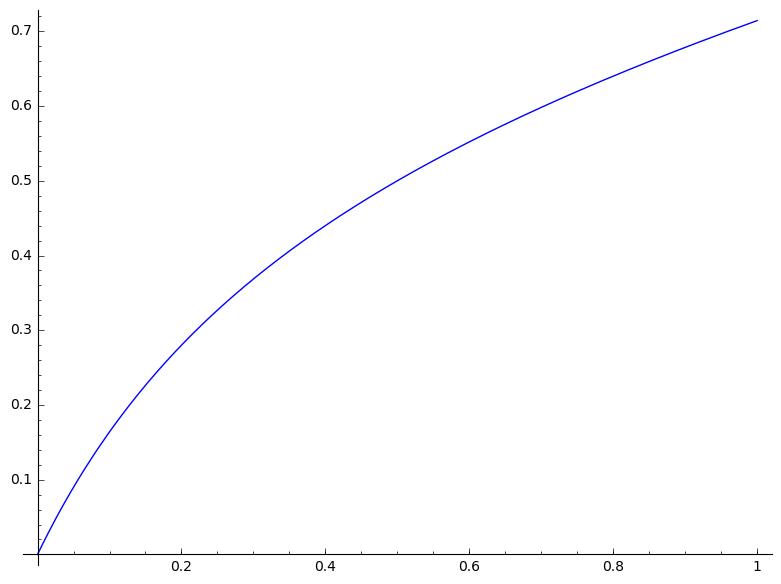

In [5]:
plot(br[0].rhs(),(w_2,0,1))


<p>As a last step, find the equilibrium by finding the wage that is a best reply to itself.&nbsp; What that means is that both firms will be best replying to the other firm if they both use this wage.</p>

In [6]:
eq3 = br[0].rhs() == w_2
show(solve (eq3,w_2))

[w_2 == (1/2), w_2 == 0]